In [46]:
# Importing all the important libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Reading the Data set
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\archive (11)\\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
# Checking Null Values in Each Column
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

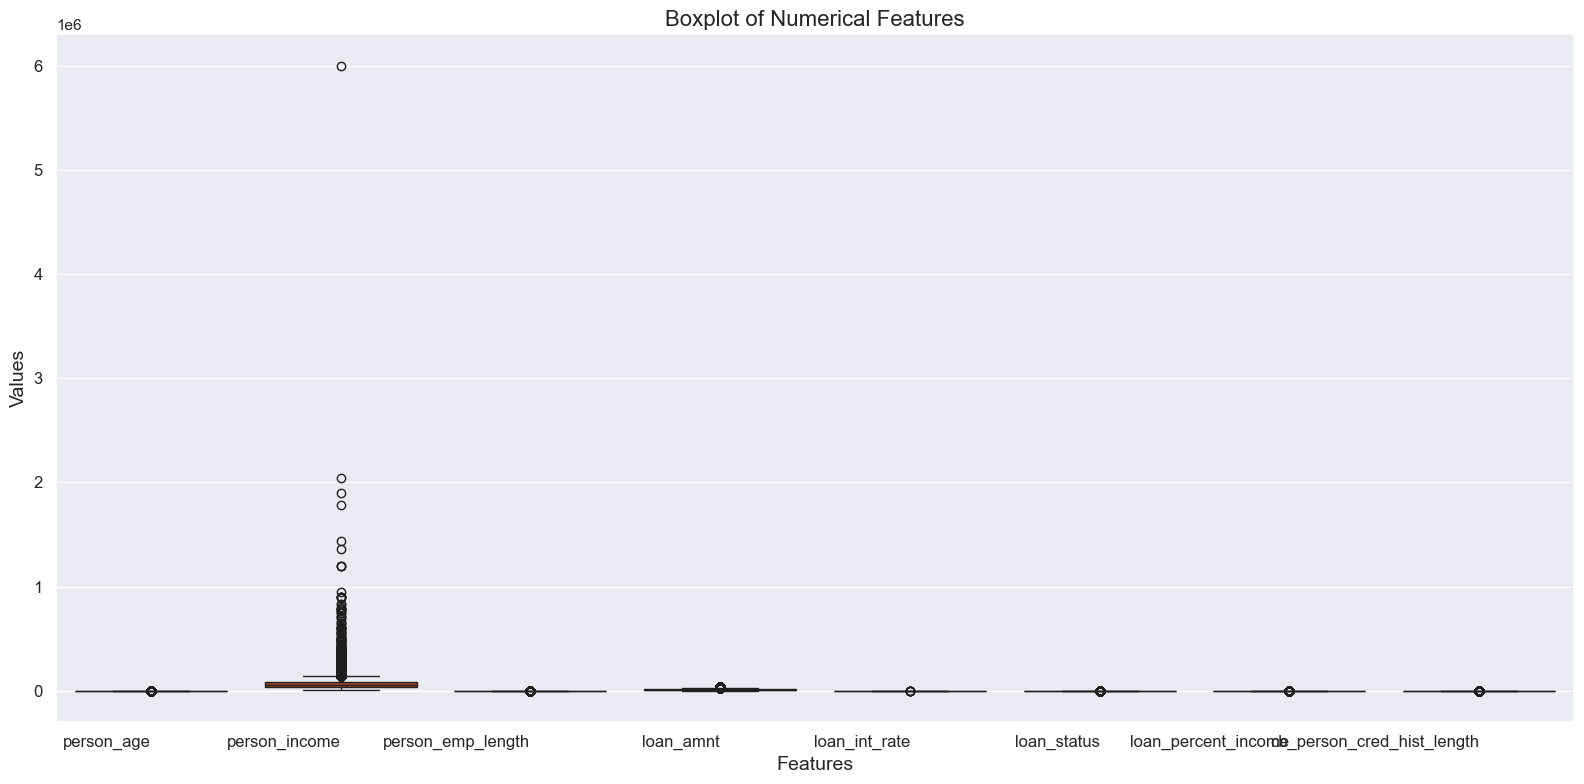

In [12]:
# We Can see there no outliers in the columns that contain missing values so we can fill those missing values with mean
plt.figure(figsize=(16,8))
sns.set()
sns.boxplot(data=df,palette='dark')
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
# We filled the missing data with their respectibbe column mean 
def fill_missing_values(df,threshold):
    for i in df.columns:
        if df[i].isnull().sum()>threshold:
            df[i].fillna(df[i].mean(),inplace=True)
    return df
  
for i in df.columns:
    threshold=df[i].isnull().sum()**0.5
handle_missing_values=fill_missing_values(df,threshold)
handle_missing_values

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

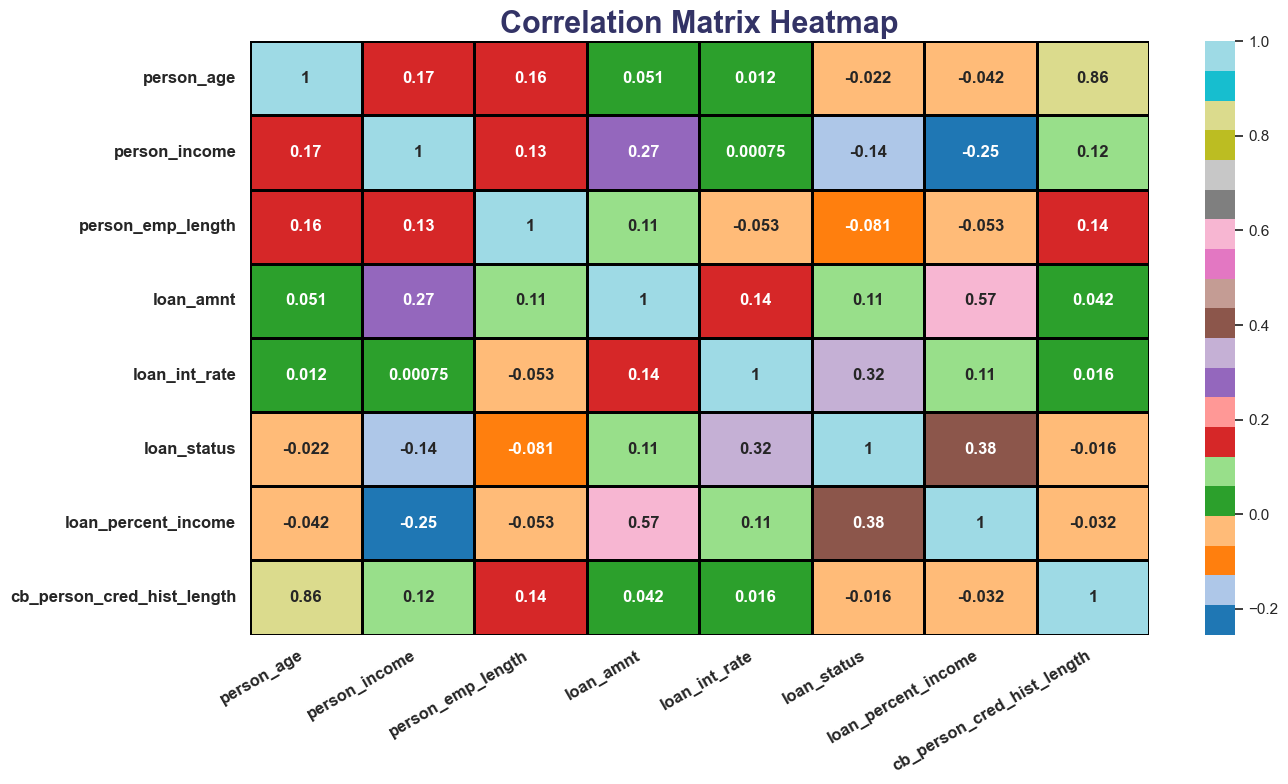

In [15]:
plt.figure(figsize=(14, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(
    corr,
    annot=True,
    cmap="tab20",
    linewidths=2,
    linecolor='black',
    annot_kws={"size": 12, "weight": "bold"}
)
plt.title("Correlation Matrix Heatmap", fontsize=22, fontweight='bold', color='#333366')
plt.xticks(fontsize=12, fontweight='bold', rotation=30, ha='right')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()

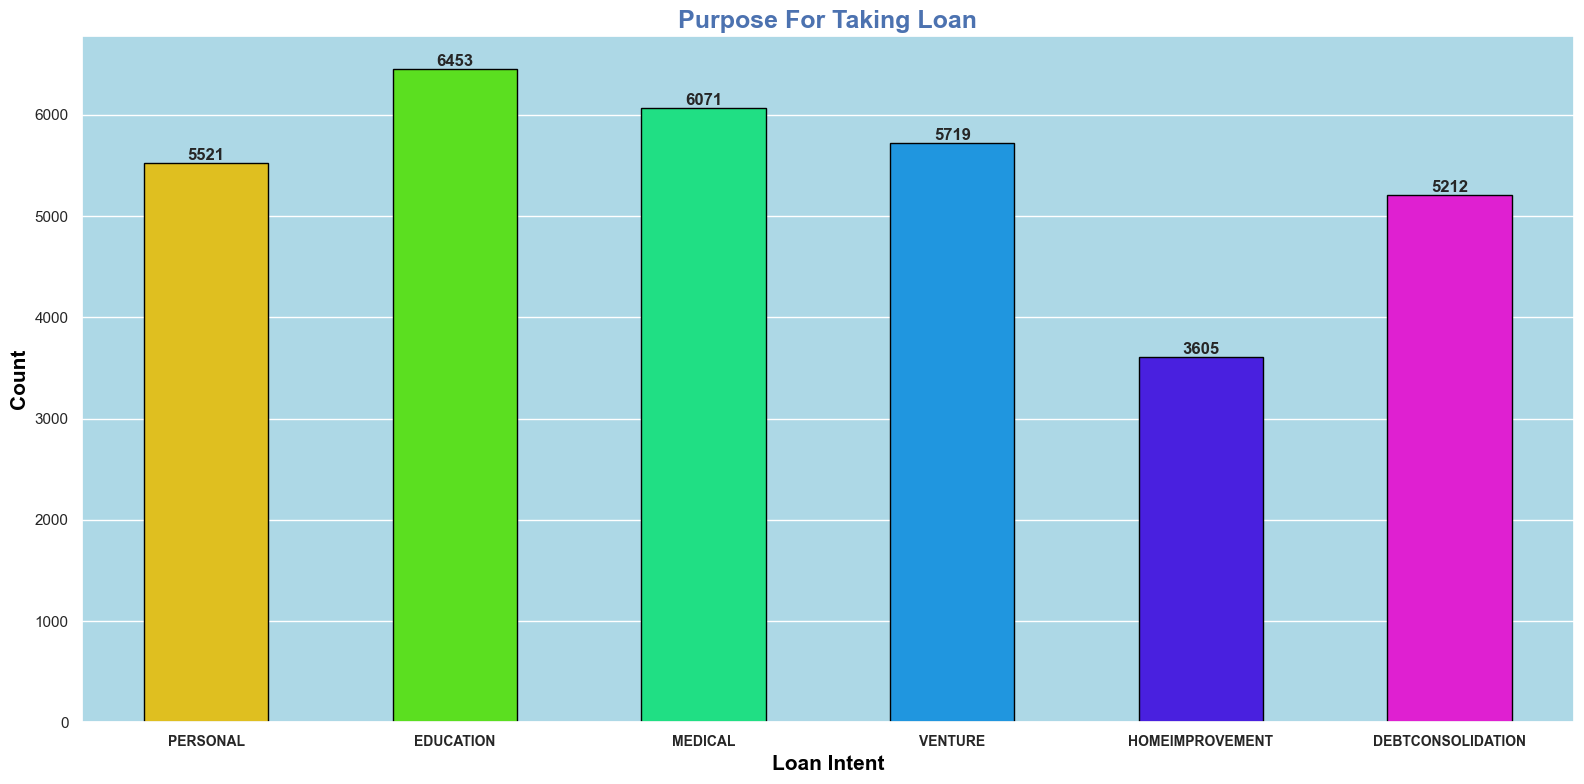

In [16]:
# Count Plot: Representing the purpose for taking load by customers
plt.figure(figsize=(16,8))
custom_colors = sns.color_palette('hsv', len(df['loan_intent'].unique()))
ax=sns.countplot(data=df,x=df['loan_intent'],palette=custom_colors,hue='loan_intent',width=.5,edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars,fontweight='bold')
ax.set_facecolor('lightblue')
plt.xticks(rotation=0,fontsize=10,fontweight='bold')
plt.title("Purpose For Taking Loan",fontsize=18,fontweight='bold',color='#4C72B0')
plt.xlabel('Loan Intent',fontsize=15,fontweight='bold',color='black')
plt.ylabel('Count',fontsize=15,fontweight='bold',color='black')
plt.tight_layout()

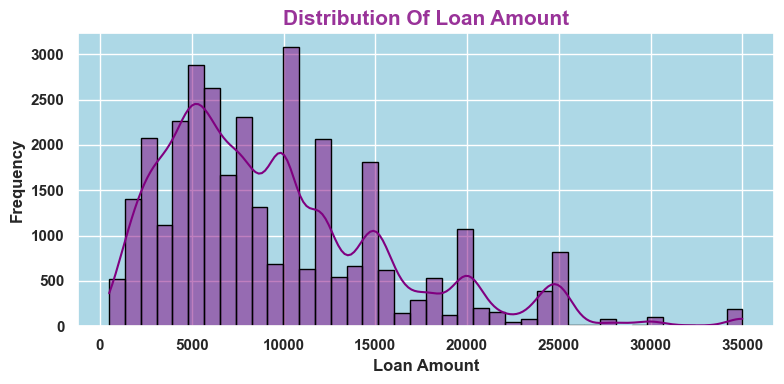

In [17]:
# Visualizing Histogram of Loan Amount
plt.figure(figsize=(8,4))
ax=sns.histplot(data=df,x='loan_amnt',color='purple',kde=True,bins=40,edgecolor='black')
plt.xlabel("Loan Amount",fontsize=12,fontweight='bold')
plt.ylabel("Frequency",fontsize=12,fontweight='bold')
ax.set_facecolor('lightblue')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title("Distribution Of Loan Amount",fontsize=15,fontweight='bold',alpha=.8,color='purple')
plt.tight_layout()

<Figure size 1000x500 with 0 Axes>

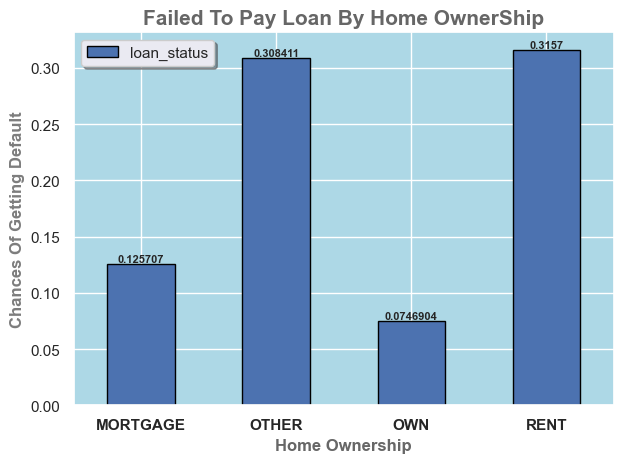

In [18]:
plt.figure(figsize=(10,5))
sns.set()
ax=df.groupby('person_home_ownership')[['loan_status']].mean().plot(kind='bar',edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars,fontsize=8,fontweight='bold')
ax.set_facecolor('lightblue')
plt.xlabel("Home Ownership",fontsize=12,fontweight='bold',alpha=.7)
plt.ylabel("Chances Of Getting Default",fontsize=12,fontweight='bold',alpha=.6)
plt.title("Failed To Pay Loan By Home OwnerShip",fontsize=15,fontweight='bold',alpha=.6,color='black')
plt.xticks(rotation=0,fontweight='bold')
plt.legend(loc='best',shadow=True)
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

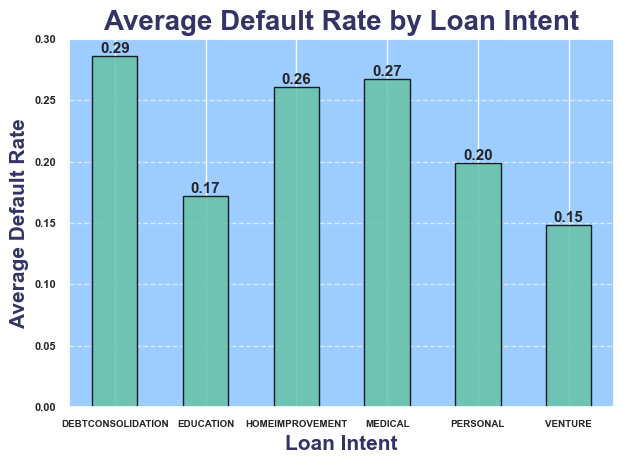

In [19]:
plt.figure(figsize=(12,6))
custom_colors = sns.color_palette('Set2', len(df['loan_intent'].unique()))
ax = df.groupby(['loan_intent'])[['loan_status']].mean().plot(
    kind='bar',
    color=custom_colors,
    edgecolor='black',
    legend=False,
    alpha=0.85
)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize=11, fontweight='bold')
ax.set_facecolor("#9dccff")
plt.title('Average Default Rate by Loan Intent', fontsize=20, fontweight='bold', color='#333366')
plt.xlabel('Loan Intent', fontsize=15, fontweight='bold', color='#333366')
plt.ylabel('Average Default Rate', fontsize=15, fontweight='bold', color='#333366')
plt.xticks(rotation=0, fontsize=7, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [20]:
# Checking the Unique values of Categorical Data
print(df['person_home_ownership'].unique())
print(df['loan_intent'].unique())
print(df['cb_person_default_on_file'].unique())
print(df['loan_grade'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['Y' 'N']
['D' 'B' 'C' 'A' 'E' 'F' 'G']


In [21]:
# Feature Engineering making data for Machine Learning algorithm
df['person_home_ownership']=df['person_home_ownership'].apply(lambda x: 1 if x=='RENT' else(2 if x=='OWN' else(3 if x=="MORTGAGE" else 4)))
df['loan_intent']=df['loan_intent'].apply(lambda x:1 if x=="PERSONAL" else(2 if x=="EDUCATION" else(3 if x=='MEDICAL'else(4 if x=="VENTURE" else(5 if x=="HOMEIMPROVEMENT" else 6)))))
df['cb_person_default_on_file']=df['cb_person_default_on_file'].apply(lambda x:1 if x=='Y' else 2)
df['loan_grade']=df['loan_grade'].apply(lambda x:1 if x=='A' else(2 if x=='B' else(3 if x=='C'else(4 if x=='D' else(5 if x=='E' else(6 if x=='F' else 7))))))


In [22]:
X=df.drop(columns={'loan_status'})
y=df['loan_status']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
# Scaled the data by using Standard Scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X_train)
x_scaled

array([[-0.2746665 ,  2.08099611,  1.12842631, ..., -0.18892827,
         0.45912126, -0.44790727],
       [ 0.50686454, -0.02688917, -0.9534263 , ...,  0.18570856,
         0.45912126,  0.54036436],
       [-0.89989133, -0.68198852, -0.9534263 , ..., -0.09526906,
         0.45912126, -0.69497518],
       ...,
       [-0.2746665 ,  1.27140656, -0.9534263 , ..., -0.28258748,
         0.45912126, -0.69497518],
       [-0.2746665 ,  1.69096352,  1.12842631, ..., -0.75088351,
         0.45912126, -0.69497518],
       [-0.11836029, -0.01834264,  1.12842631, ..., -0.46990589,
         0.45912126,  0.54036436]])

In [25]:
import joblib
joblib.dump(scalar,'scalar.pkl')

['scalar.pkl']

KNN Algorithm

In [38]:
def knn_model(param_grid):
    knn=KNeighborsClassifier()
    knn_grid=GridSearchCV(knn,param_grid=param_grid,cv=5,scoring='accuracy')
    knn_grid.fit(X_train,Y_train)
    print(knn_grid.best_params_)
    y_pred=knn_grid.predict(X_test)
    return y_pred,knn_grid

param_grid={
    'n_neighbors':[3,5,7,9,11],
    'metric':['euclidean','manhattan'],
    'weights':['unifrom','distance'],
}

KNN=knn_model(param_grid)
KNN

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


(array([1, 1, 0, ..., 0, 0, 0], dtype=int64),
 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
              param_grid={'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [3, 5, 7, 9, 11],
                          'weights': ['unifrom', 'distance']},
              scoring='accuracy'))

In [39]:
def Accuracy_Score(prediction):
    print("Model Accuracy",accuracy_score(Y_test,prediction))
def Classsification_report(prediction):
    print("Classificationn Report Of Model:")
    print(classification_report(Y_test,prediction))
def Confusion_Matrix(prediction):
    print("Confusion Matrix:")
    return confusion_matrix(Y_test,prediction)

Accuracy_Score(KNN[0])
Classsification_report(KNN[0])
Confusion_Matrix(KNN[0])


Model Accuracy 0.8475325313037073
Classificationn Report Of Model:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6331
           1       0.71      0.54      0.61      1815

    accuracy                           0.85      8146
   macro avg       0.79      0.74      0.76      8146
weighted avg       0.84      0.85      0.84      8146

Confusion Matrix:


array([[5924,  407],
       [ 835,  980]], dtype=int64)

Confusion Matrix:


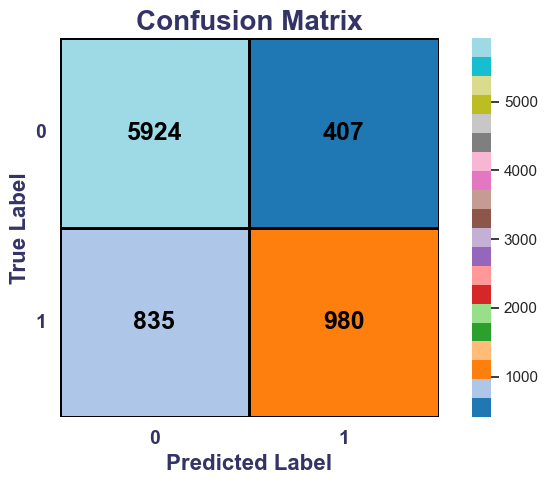

In [28]:
def Visulalize_CM(cm):
    plt.figure(figsize=(7,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='tab20',
        linewidths=2,
        linecolor='black',
        cbar=True,
        square=True,
        annot_kws={"size": 18, "weight": "bold", "color": "black"}
    )
    plt.title('Confusion Matrix', fontsize=20, fontweight='bold', color='#333366')
    plt.xlabel('Predicted Label', fontsize=16, fontweight='bold', color='#333366')
    plt.ylabel('True Label', fontsize=16, fontweight='bold', color='#333366')
    plt.xticks(fontsize=14, fontweight='bold', color='#333366')
    plt.yticks(fontsize=14, fontweight='bold', color='#333366', rotation=0)
    plt.tight_layout()
    plt.show()

Visulalize_CM(Confusion_Matrix(KNN))


Logistic Regression

In [40]:
def lr_model():
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    return lr.predict(X_test),lr

Logistic_Regression=lr_model()
Logistic_Regression


(array([0, 1, 0, ..., 0, 0, 0], dtype=int64), LogisticRegression())

Classificationn Report Of Model:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6331
           1       0.69      0.35      0.47      1815

    accuracy                           0.82      8146
   macro avg       0.77      0.65      0.68      8146
weighted avg       0.81      0.82      0.80      8146

Model Accuracy 0.8212619690645716
Confusion Matrix:


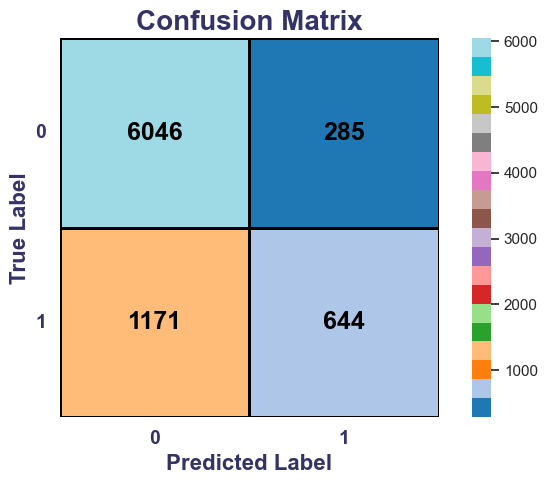

In [41]:
Classsification_report(Logistic_Regression[0])
Accuracy_Score(Logistic_Regression[0])
Visulalize_CM(Confusion_Matrix(Logistic_Regression[0]))

Random Forest Classifier

In [37]:
def Random_Forest():
  RM=RandomForestClassifier(random_state=42,max_depth=8,max_features=11,criterion='entropy')
  RM.fit(X_train,Y_train)
  y_pred=RM.predict(X_test)
  return y_pred,RM 



Random_Forest_Classifier=Random_Forest()
Random_Forest_Classifier

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 RandomForestClassifier(criterion='entropy', max_depth=8, max_features=11,
                        random_state=42))

Model Accuracy 0.9289221703903756
Classificationn Report Of Model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6331
           1       0.98      0.70      0.81      1815

    accuracy                           0.93      8146
   macro avg       0.95      0.85      0.89      8146
weighted avg       0.93      0.93      0.92      8146

Confusion Matrix:


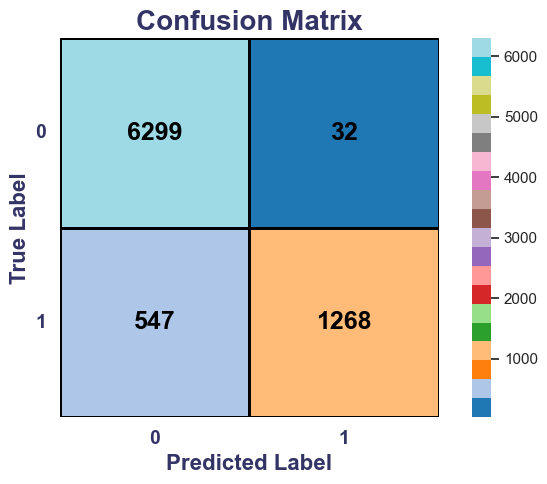

In [43]:
Accuracy_Score(Random_Forest_Classifier[0])
Classsification_report(Random_Forest_Classifier[0])
Visulalize_CM(Confusion_Matrix(Random_Forest_Classifier[0]))

Decision Tree Classifier

In [44]:
def Decision_Tree(param_grid):
    dsc_tree=DecisionTreeClassifier(random_state=42)
    grd_dsc=GridSearchCV(dsc_tree,param_grid=param_grid,cv=5,scoring='accuracy')
    grd_dsc.fit(X_train,Y_train)
    print(grd_dsc.best_params_)
    best_model=grd_dsc.best_estimator_
    joblib.dump(best_model,'Model1.pkl')
    y_pred=grd_dsc.predict(X_test)
    return y_pred,grd_dsc

param_grid1={
    'max_depth':[2,4,6,8,10],
    'max_features':[3,6,8,11],
    'criterion':['gini','entropy']
}
dsc_tree=Decision_Tree(param_grid1)
dsc_tree


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 11}


(array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8, 10],
                          'max_features': [3, 6, 8, 11]},
              scoring='accuracy'))

Model Accuracy 0.9305180456665848
Classificationn Report Of Model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6331
           1       0.96      0.72      0.82      1815

    accuracy                           0.93      8146
   macro avg       0.94      0.85      0.89      8146
weighted avg       0.93      0.93      0.93      8146

Confusion Matrix:


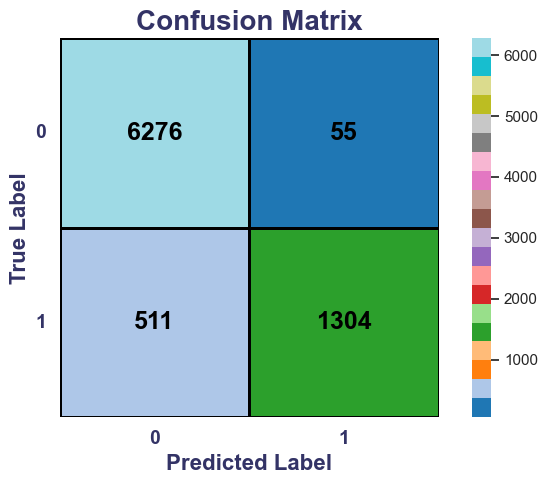

In [45]:
Accuracy_Score(dsc_tree[0])
Classsification_report(dsc_tree[0])
Visulalize_CM(Confusion_Matrix(dsc_tree[0]))

In [55]:
classifiers=[('K Neighbors Classifier',KNN[1]),("Logistic Regression",Logistic_Regression[1]),
             ('Decision Tree Classifier',dsc_tree[1]),("Random Forest",Random_Forest_Classifier[1])]

def Voting_Classifier(n_estimators):
    vc=VotingClassifier(estimators=n_estimators)
    vc.fit(X_train,Y_train)
    y_pred=vc.predict(X_test)
    return y_pred

voting_classifier=Voting_Classifier(classifiers)
voting_classifier

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Model Accuracy 0.8989688190522956
Classificationn Report Of Model:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6331
           1       0.98      0.56      0.71      1815

    accuracy                           0.90      8146
   macro avg       0.93      0.78      0.82      8146
weighted avg       0.91      0.90      0.89      8146

Confusion Matrix:


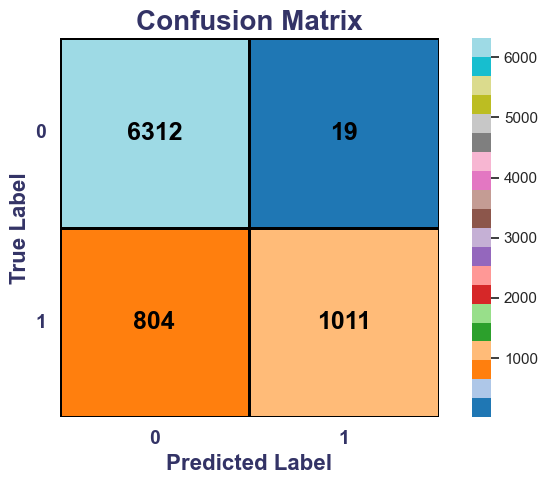

In [58]:
Accuracy_Score(voting_classifier)
Classsification_report(voting_classifier)
Visulalize_CM(Confusion_Matrix(voting_classifier))